<a href="https://colab.research.google.com/github/yev34/Machine-learning/blob/main/%D0%9F%D0%B0%D1%82%D0%B0%D0%BB%D0%B0%D1%88%D0%BA%D0%BE_%D0%BB%D0%B0%D0%B110.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


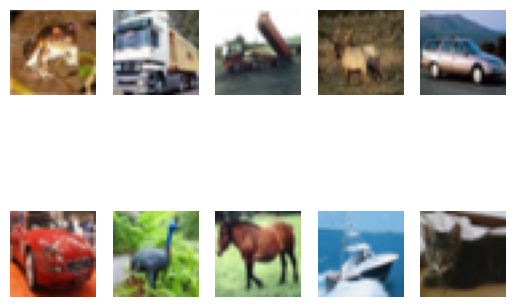

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

# Завантажуємо датасет CIFAR-10
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Виводимо перші 10 зображень
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()


In [2]:
# Нормалізуємо зображення
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Перетворюємо мітки в one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [3]:
from tensorflow.keras import layers, models

model = models.Sequential()

# Додаємо згорткові шари
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Додаємо повнозв'язні шари
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Компіляція моделі
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)

In [5]:
# Виведемо інформацію про модель
model.summary()

# Навчаємо модель
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 90ms/step - accuracy: 0.3104 - loss: 1.8637 - val_accuracy: 0.4683 - val_loss: 1.4636 - learning_rate: 0.0010
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 87ms/step - accuracy: 0.5223 - loss: 1.3318 - val_accuracy: 0.5748 - val_loss: 1.2165 - learning_rate: 0.0010
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.5907 - loss: 1.1579 - val_accuracy: 0.6266 - val_loss: 1.0798 - learning_rate: 0.0010
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.6403 - loss: 1.0251 - val_accuracy: 0.6527 - val_loss: 1.0073 - learning_rate: 0.0010
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 90ms/step - accuracy: 0.6690 - loss: 0.9471 - val_accuracy: 0.6479 - val_loss: 1.0070 - learning_rate: 0.0010
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 88ms/step - accuracy: 0.6900 - loss: 0.8790 - val_accuracy: 0.6674 - val_loss: 0.9605 - learning_rate: 0.0010
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.7086 - l


 Класифікаційний звіт

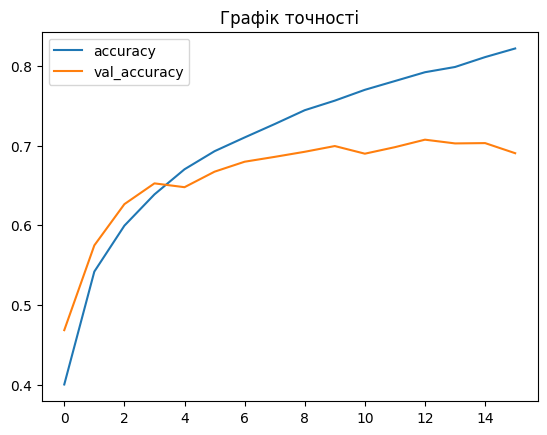

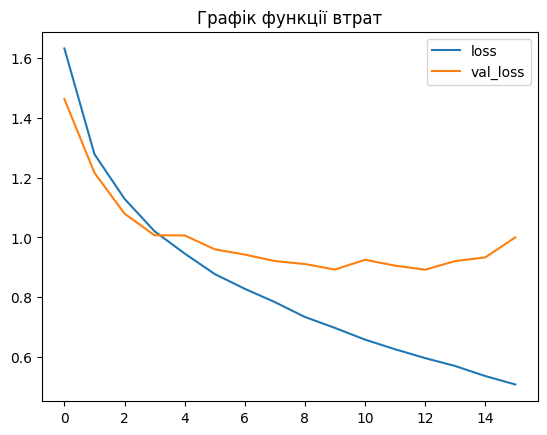

In [6]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Графік точності')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Графік функції втрат')
plt.legend()
plt.show()

Візуалізація розпізнавання

In [7]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

print(classification_report(y_true, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step
              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1000
           1       0.87      0.78      0.82      1000
           2       0.65      0.55      0.59      1000
           3       0.50      0.50      0.50      1000
           4       0.68      0.64      0.66      1000
           5       0.61      0.61      0.61      1000
           6       0.68      0.84      0.75      1000
           7       0.74      0.77      0.76      1000
           8       0.79      0.83      0.81      1000
           9       0.78      0.81      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000



# Завдання 2: Попередньо навчені моделі (VGG16, VGG19 або ResNet)


In [8]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Model

# Завантажимо модель VGG16 без верхніх шарів
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Заморожуємо шари для тонкого налаштування
for layer in base_model.layers:
    layer.trainable = False

# Додаємо нові шари
x = layers.Flatten()(base_model.output)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(10, activation='softmax')(x)

# Створюємо нову модель
model_vgg = Model(base_model.input, x)

# Компіляція моделі
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Колбеки для ранньої зупинки та зменшення швидкості навчання
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)

# Навчання моделі
history_vgg = model_vgg.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stopping, reduce_lr])


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 648s 1s/step - accuracy: 0.4054 - loss: 1.7108 - val_accuracy: 0.5486 - val_loss: 1.2938 - learning_rate: 0.0010
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 650s 1s/step - accuracy: 0.5618 - loss: 1.2658 - val_accuracy: 0.5681 - val_loss: 1.2306 - learning_rate: 0.0010
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 652s 994ms/step - accuracy: 0.5884 - loss: 1.1884 - val_accuracy: 0.5791 - val_loss: 1.2040 - learning_rate: 0.0010
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 616s 984ms/step - accuracy: 0.5947 - loss: 1.1619 - val_accuracy: 0.5827 - val_loss: 1.1942 - learning_rate: 0.0010
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 637s 1s/step - accuracy: 0.6110 - loss: 1.1183 - val_accuracy: 0.5867 - val_loss: 1.1832 - learning_rate: 0.0010
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 662s 976ms/step - accuracy: 0.6138 - loss: 1.0979 - val_accuracy: 0.5922 - val_loss: 1.1654 - learning_rate: 0.0010
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 632s 1s/step - accuracy: 0.6211 -

In [10]:
# Виведення структури моделі
model_vgg.summary()


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 14,815,136 (56.52 MB)

 Trainable params: 33,482 (130.79 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 66,966 (261.59 KB)

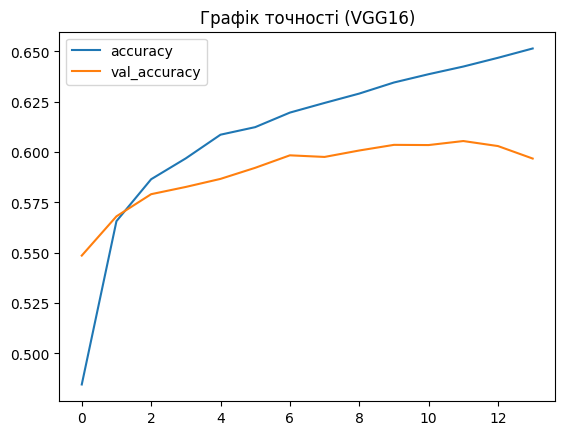

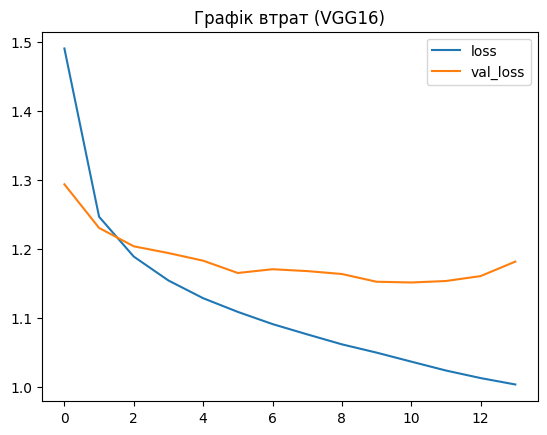

In [11]:
import matplotlib.pyplot as plt

# Графік точності
plt.plot(history_vgg.history['accuracy'], label='accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='val_accuracy')
plt.title('Графік точності (VGG16)')
plt.legend()
plt.show()

# Графік втрат
plt.plot(history_vgg.history['loss'], label='loss')
plt.plot(history_vgg.history['val_loss'], label='val_loss')
plt.title('Графік втрат (VGG16)')
plt.legend()
plt.show()


In [12]:
from sklearn.metrics import classification_report

# Передбачення на тестовому наборі
y_pred_vgg = model_vgg.predict(x_test)
y_pred_classes_vgg = y_pred_vgg.argmax(axis=1)
y_true_vgg = y_test.argmax(axis=1)

# Виведення класифікаційного звіту
print(classification_report(y_true_vgg, y_pred_classes_vgg))


313/313 ━━━━━━━━━━━━━━━━━━━━ 126s 401ms/step
              precision    recall  f1-score   support

           0       0.70      0.63      0.66      1000
           1       0.68      0.64      0.66      1000
           2       0.47      0.54      0.50      1000
           3       0.44      0.43      0.44      1000
           4       0.57      0.53      0.55      1000
           5       0.60      0.46      0.52      1000
           6       0.59      0.69      0.64      1000
           7       0.67      0.65      0.66      1000
           8       0.68      0.76      0.72      1000
           9       0.60      0.65      0.62      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.60     10000
weighted avg       0.60      0.60      0.60     10000



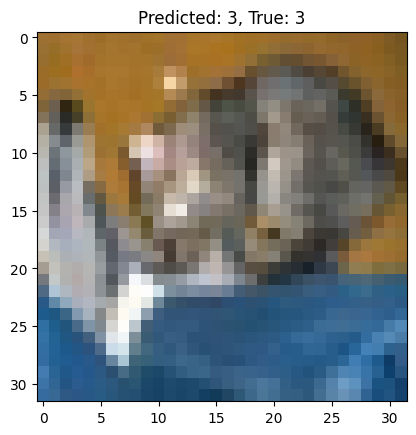

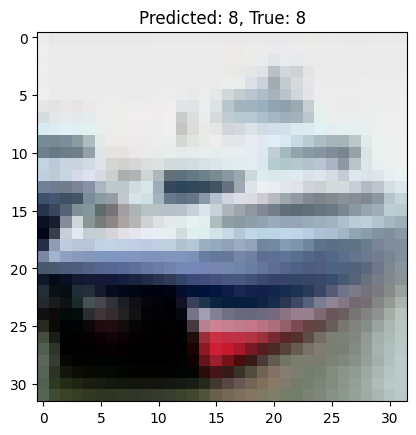

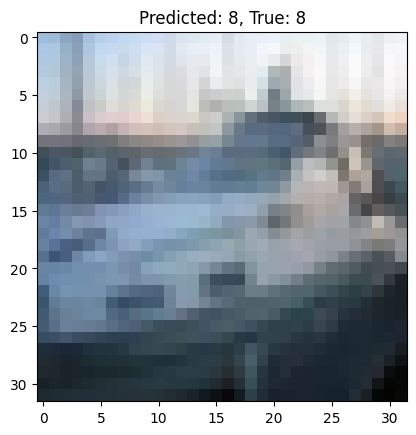

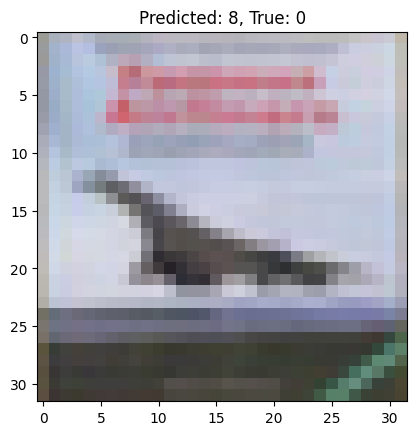

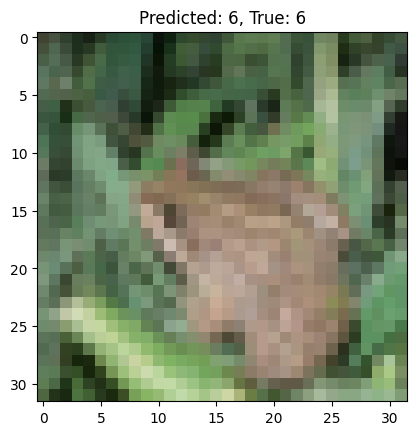

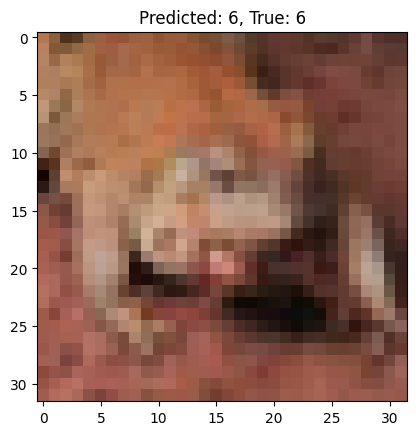

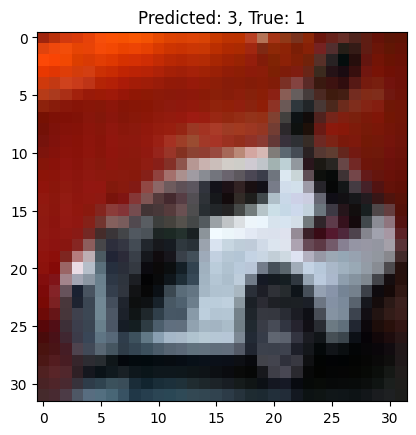

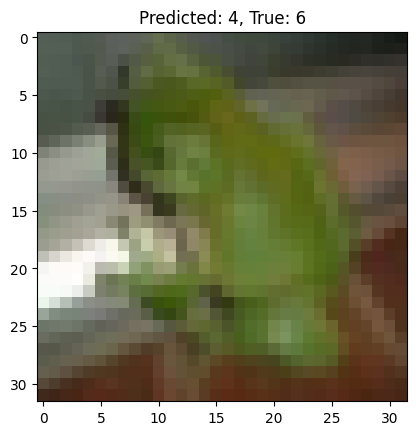

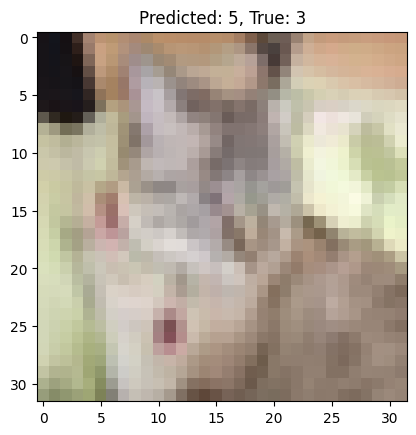

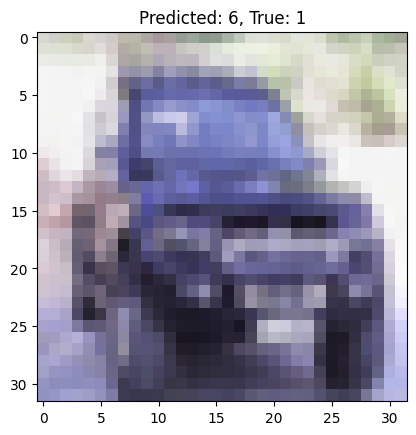

In [13]:
# Візуалізація передбачень для перших 10 тестових зображень
for i in range(10):
    plt.imshow(x_test[i])
    plt.title(f'Predicted: {y_pred_classes_vgg[i]}, True: {y_true_vgg[i]}')
    plt.show()
